<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday July 13**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [12 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus

You are working as a Data Scientist for an internet company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Daley is particularly interested to see if the data suggests that more than 10% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.10$. 

Here Daley is wrong because he is interested in whether the population proportion $p$ is different from 0.10 not whether the sample proportion $\hat{p}$ is different. He will know the sample proportion exactly but is interested in how that estimates $p$. Therefore, he should use $H_0 : \, p = 0.10$.

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.10$.  

Daley is incorrect because the null hypothesis should be $p=0.10$ corresponding to the situation that 10% of website visitors buy something. This is the proper null hypothesis because a single value should be tested: the value in which there is no significant difference between the populations. In Daley's situation, he wants to see if there is a difference between a population in which 10% of visitors buy something and the real population. 

With the null hypothesis of $H_0 : \, p = 0.10$, Daley can perform a proper 1-tailed P-Test with the alternative hypothesis that $H_1 : \, p > 0.10$. 

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.10$ and $H_1: p > 0.10$, Daley computes a normalized test-statistic of $z = -1.4$ for the sample proportion and concludes that since $z = -1.4 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 10%.

This is very incorrect because Daley is comparing a Z score to a p-value. Instead, he should compute the CDF of the normal distribution at $z = -1.4$ and subtract that from 1 because this is a one-tail p-test for the right tail of the distribution. This will obtain the correct p-value which can be compared to the significance level. 

Moreover, Daley is interpreting the meaing of the p-test incorrectly. If the p-value satisfies the comparison with the significance level with this alternative hypothesis, then we can simply say that we can reject the null hypothesis that $p=0.10$, not that the proportion of customers who buy something is less than 10%, $p < 0.10$.

**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.10$ and $H_1: p > 0.10$. He computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

Once again, Daley has it twisted. A p-value of 0.03 does not mean that there is a 3% chance that the null hypothesis is true, but rather that there is a 3% chance of observing something as extreme or more extreme than what was actually observed.

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Pizza Delivery Performance 

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in [`pizza.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7mvrrc671). 

In [3]:
dfP = pd.read_csv("data/pizza.csv")
dfP.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,1-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,1-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,3
2,Thursday,1-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,1-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,1-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypotheses, describe your testing procedure, and show all calculations in Python. 

Because there is a sufficient number of samples to draw from (1,200) and there is reason to believe that the time data will be normally distributed, a one-tailed p-test is appropriate to examine the data. We can propose the null hypothesis $H_0 : \, \mu = 30$min per delivery and the alternative hypothesis that $H_1 : \, \mu < 30$ mins per delivery. Next, the mean ($\bar{x}$), number of samples ($n$), and variance ($s^2$ which estimates $\sigma^2$) of the samples from the data set must be calculated to obtain a Z-score which can be used to calculate the p-value.

In [4]:
xbar = np.mean(dfP["time"])
sigma2 = np.var(dfP["time"], ddof=1)
n = len(dfP["time"])
mu = 30

print("Mean delivery time xbar: {:0.3f} min".format(xbar))
print("Variance in delivery time sigma2: {:0.3f} min^2".format(sigma2))
print("Number of samples: {}".format(n))

Mean delivery time xbar: 29.455 min
Variance in delivery time sigma2: 37.352 min^2
Number of samples: 1266


Knowing $\bar{x}=29.455$ min, $\mu = 30$ min (from the null hypothesis), and $\sigma^2 = 37.352$ min$^2$, these values can be plugged into the formula for calculating a Z-score:

$$
Z = \frac{\bar{x} - \mu}{\sqrt{\frac{\sigma^2}{n}}}
$$

This is evaluated below.

In [5]:
z = (xbar - mu)/np.sqrt(sigma2/n)

print("Z = {:0.3f}".format(z))

Z = -3.171


Finally, by calculating what the CDF of the normal distribution is up to $Z=-3.171$, we obtain the p-value for this data. This calculation is performed below.

In [6]:
p = stats.norm.cdf(z)

print("p-value = {:0.5f}".format(p))

p-value = 0.00076


Since $p = 7.6 \times 10^{-4} < 0.05 = \alpha$, the null hypothesis that the mean delivery time is 30 mins can be rejected in favor of the alternative hypothesis that the mean delivery time is less than 30 mins. 

**Part B**: The pizza shop has fallen on hard times and is considering closing a branch. The manager knows that the East branch is the lowest performing branch, followed by the West branch, as measured by the the mean number of pizzas per delivery.

In [7]:
for branch in set(dfP["branch"]):
    print("{:6s} branch mean pizzas/delivery = {:0.3f}".format(branch, dfP.loc[dfP["branch"]==branch, "pizzas"].mean()))

Centre branch mean pizzas/delivery = 3.368
East   branch mean pizzas/delivery = 2.429
West   branch mean pizzas/delivery = 3.207


Can the manager conclude that the East branch is performing statistically significantly lower than the other two branches? Can he conclude that the West branch performs significantly worse than the Centre branch? Conduct hypothesis tests to answer these questions. Both of those questions will help him decide whether or not to close the East branch. The stakes are higher when making the decision to close an entire branch of pizza restaurant, so the manager decides to use the $\alpha=0.01$ significance level for these tests. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

To test if the East branch is performing worse than the other two, two hypothesis hypothesis tests are performed. First, the East and West branch are compared via a one-tailed p-test at the $\alpha = 0.01$ significance level. Then, the East and Centre branch are compared via a one-tailed p-test at the $\alpha = 0.01$ significance level. The null hypothesis for both tests is $H_0 : \, \mu_E = \mu_X$ where $X$ is either the mean of the pizzas per delivery for East or Center branch ($E$ and $C$ respectively). The alternative hypothesis is then $H_1 : \, \mu_E < \mu_X$. Next, the West branch is compared to the center branch using a one-tailed p-test with significance level $\alpha = 0.01$ with the null hypothesis $H_0 : \, \mu_W = \mu_C$ and the alternative hypothesis $H_1 : \, \mu_W < \mu_C$. Calculations for all three of these tests are carried out similarly to Part A and are performed below.

In [10]:
west_side = dfP.loc[dfP["branch"] == 'West', "pizzas"]
east_side = dfP.loc[dfP["branch"] == 'East', "pizzas"]
centre_jabronies = dfP.loc[dfP["branch"] == 'Centre', "pizzas"]

# Verify that I can type
print("Deliveries at each branch: W: {0}, E: {1}, C:{2}".format(len(west_side), len(east_side), len(centre_jabronies)))

# Basic information
xw_bar = np.mean(west_side)
xe_bar = np.mean(east_side)
xc_bar = np.mean(centre_jabronies)

print("Mean deliveries at each branch: W: {0:0.3f}, E: {1:0.3f}, C:{2:0.3f}".format(xw_bar, xe_bar, xc_bar))

varw = np.var(west_side, ddof=1)
vare = np.var(east_side, ddof=1)
varc = np.var(centre_jabronies, ddof=1)

print("Delivery variance at each branch: W: {0:0.3f}, E: {1:0.3f}, C:{2:0.3f}".format(varw, vare, varc))

nw = len(west_side)
ne = len(east_side)
nc = len(centre_jabronies)

# ------- TEST 1 -------
z1 = (xe_bar-xw_bar)/np.sqrt(vare/ne + varw/nw)
print("z-score for test 1 = {:0.3f}".format(z1))
p1 = stats.norm.cdf(z1)
print("p-value for test 1 = {:0.3e}".format(p1))

# ------- TEST 2 -------
z2 = (xe_bar-xc_bar)/np.sqrt(vare/ne + varc/nc)
print("z-score for test 2 = {:0.3f}".format(z2))
p2 = stats.norm.cdf(z2)
print("p-value for test 2 = {:0.3e}".format(p2))

# ------- TEST 3 -------
z3 = (xw_bar-xc_bar)/np.sqrt(varw/nw + varc/nc)
print("z-score for test 3 = {:0.3f}".format(z3))
p3 = stats.norm.cdf(z3)
print("p-value for test 3 = {:0.3e}".format(p3))

Deliveries at each branch: W: 435, E: 410, C:421
Mean deliveries at each branch: W: 3.207, E: 2.429, C:3.368
Delivery variance at each branch: W: 2.091, E: 1.625, C:1.914
z-score for test 1 = -8.304
p-value for test 1 = 5.018e-17
z-score for test 2 = -10.178
p-value for test 2 = 1.237e-24
z-score for test 3 = -1.668
p-value for test 3 = 4.770e-02


Based on the tests above, we find the following results:

Test 1:
The p-value is about $5.0 \times 10^{-17} < \alpha$ so we reject the null hypothesis that the East branch delivers the same number of pizzas as the West branch at the 0.01 significance level.

Test 2:
The p-value is about $1.2 \times 10^{-24} < \alpha$ so we reject the null hypothesis that the East branch delivers the same number of pizzas as the Centre branch at the 0.01 significance level.

Test 3:
The p-value is about $0.048 > \alpha$ so we fail to reject the null hypothesis that the West branch delivers the same number of pizzas as the Center branch at the 0.01 significance level. 

Based on these results, we can conclude that the East branch performs worse than the other two branches by a statistically significant margin when using the pizzas per delivery as a metric.

**Part C**: It has been hypothesized that two of the manager's finest drivers, Mario and Luigi, deliver different numbers of pizzas per delivery. Conduct an appropriate hypothesis test at the $\alpha = 0.05$ significance level to determine if there is any statistically significant difference between the mean number of pizzas per delivery for the two drivers.

In this part, a two-tailed p-test with significance level $\alpha = 0.05$ to compare Mario and Luigi. Calculations similar to the above will be carried out, but this time the null hypothesis will be $H_0 : \, \mu_M = \mu_L$ and the alternative hypothesis will be $H_1 : \, \mu_M \neq \mu_L$. 

In [11]:
mario = dfP.loc[dfP["driver"] == "Mario", "pizzas"]
luigi = dfP.loc[dfP["driver"] == "Luigi", "pizzas"]

nm = len(mario)
nl = len(luigi)

xbar_mario = np.mean(mario)
xbar_luigi = np.mean(luigi)

varm = np.var(mario, ddof=1)
varl = np.var(luigi, ddof=1)

z = (xbar_mario - xbar_luigi)/np.sqrt(varm/nm + varl/nl)

p = 2*stats.norm.cdf(-np.abs(z))
print("p-value for driver comparison = {:0.5f}".format(p))

p-value for driver comparison = 0.09474


In this test we find that $p=0.095 > 0.05 = \alpha$. Therefore, we fail to reject the null hypothesis and conclude that Mario and Luigi deliver about the same number of pizzas.

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so I think. Let's find out, in this exciting homework problem!

One recent study investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python, and report the results.  Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?

Here I borrow parts of the `ci_mean` function from Homework \#5 and modify it to produce a confidence interval for a t-distribution as opposed to a normal distribution.

In [12]:
def ci_mean(xbar, sx, n, alp=0.05):
    nu = n-1
    t = stats.t.ppf(1-alp/2, nu)
    scale = t*np.sqrt(sx/n)
    return (xbar - scale, xbar + scale)

Now I can easily find the confidence intervals by plugging in the given values from the table into the function using the default `alp=0.05`.

95.0% CI for coffee nap: [428.480,474.120] ms
95.0% CI for coffee: [465.872,522.528] ms
95.0% CI for nap: [460.466,525.134] ms


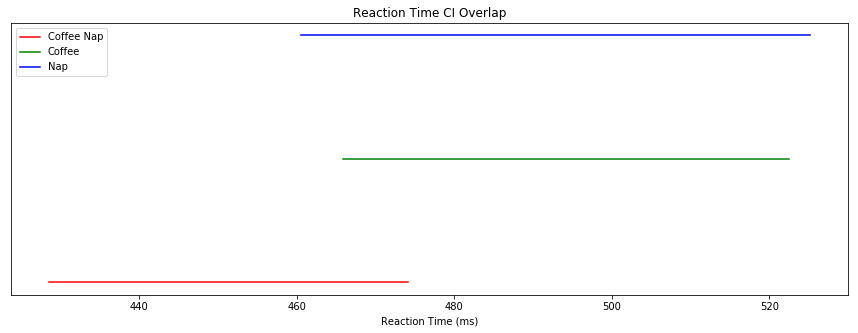

In [14]:
alp = 0.05

# Coffee Nap
ci1 = ci_mean(451.3, 31.9**2, 10)
print("{0:0.1f}% CI for coffee nap: [{1:0.3f},{2:0.3f}] ms".format(100*(1-alp), ci1[0], ci1[1]))

# Coffee
ci2 = ci_mean(494.2, 39.6**2, 10)
print("{0:0.1f}% CI for coffee: [{1:0.3f},{2:0.3f}] ms".format(100*(1-alp), ci2[0], ci2[1]))

# Nap
ci3 = ci_mean(492.8, 45.2**2, 10)
print("{0:0.1f}% CI for nap: [{1:0.3f},{2:0.3f}] ms".format(100*(1-alp), ci3[0], ci3[1]))

# Plot
plt.figure(figsize=(15,5))
plt.plot(ci1, [1,1], 'r', label="Coffee Nap")
plt.plot(ci2, [2,2], 'g', label="Coffee")
plt.plot(ci3, [3,3], 'b', label="Nap")
plt.legend()
plt.yticks([],[])
plt.xlabel("Reaction Time (ms)")
plt.title("Reaction Time CI Overlap")
plt.show()

As shown in the above graph, all three 95% confidence intervals overlap, so no conclusion can immediately be drawn.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

The data provided here is sufficient to perform a one-tailed t-test at the $\alpha = 0.05$ significance level that compares taking a nap to drinking coffee. Here the null hypothesis is $H_0 : \, \mu_N = \mu_C$, that there is no difference in reaction time from drinking coffee or taking a nap. The alternative hypothesis is $H_1 : \, \mu_N < \mu_C$, that taking a nap results in a faster reaction time than having coffee. Calculations here are very similar to the other problems in this homework, except a t-distribution is used in lieu of the normal distribution. These calculations are carried out below.

In [17]:
xbar_n = 492.8
xbar_c = 494.2

var_n = 45.2**2
var_c = 39.6**2

n = 10 # samples the same for both
nu = n - 1

t = (xbar_n - xbar_c)/np.sqrt(var_n/n + var_c/n)
p = stats.t.cdf(t, nu)
print("p-value for Nap vs. Coffee: {:0.3f}".format(p))

p-value for Nap vs. Coffee: 0.471


Because $p = 0.471 > 0.05 = \alpha$ we fail to reject the null hypothesis and conclude that having coffee or taking a nap result in about the same reaction time.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

---
[Back to top](#top)
<a id='p4'></a>

### [15 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month, and keep track of which email client (Outlook or Gmail) the customers use.

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in [`email.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7qay9y674). Load this dataset into Pandas. 

In [ ]:
dfAd = pd.read_csv("data/email.csv")
dfAd.head()

**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

**Part C**: "Aw, shucks!", Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

---
[Back to top](#top)
<a id='p5'></a>

### [15 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

The data in [`icecream.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n80849467a) contains information on a particular runner's ice cream eaten (in scoops) and miles run on particular days over the past year. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [ ]:
dfTreats = pd.read_csv("data/icecream.csv")
dfTreats.head()

**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

**Part E**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

---
[Back to top](#top)
<a id='p6'></a>

### [15 points] Problem 6 - "Central Limit-ish Theorem" for the Log-normal Distribution

The log-normal distribution arises in many applications, such as (but not limited to!) modeling the distribution of extreme values like monthly rainfall, modeling the distribution of income for the bulk of the population, and the length of some board games. It is useful, but can be a little tough to wrap your head around at first. There is a "logarithm" right in the name, after all. So let's tame this beast.

Execute the code below to obtain a sample of 10,000 random draws from a [log-normal distribution](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html) with parameters $\mu = 3$ and $\sigma = 0.25$.

In [ ]:
sigma = 0.25
mu = 3
n = 10000
x = pd.Series(np.random.lognormal(mean=mu, sigma=sigma, size=n))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
x.hist(ax=ax, edgecolor="white", bins=20, normed=True)
ax.set_xlim([0,50])
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('X ~ LogNorm({}, {})'.format(mu,sigma))
ax.set_axisbelow(True)
ax.grid(alpha=0.25);

**Part A**: Recall that the log-normal pdf for a random variable $X$ is given by
$$f(x \mid \mu, \sigma) = \dfrac{1}{x\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{\log{x} - \mu}{\sigma}\right)^2}$$

Thus, if you have a random variable $X \sim LogNorm(\mu, \sigma)$, the transformed random variable $Y = \log(X)$ must have $Y \sim N(\mu, \sigma^2)$. Verify this by plotting a density histogram of $Y = \log(X)$, along with the normal pdf $f(y \mid \mu, \sigma^2)$. Be sure to label everything in your _single-panel_ figure and include a legend. Write 1-2 sentences commenting on the agreement.

**Part B**: Now, read in the file [`lognorm.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7bg98m66x), available linked here and on Piazza. These are 25 samples from a log-normal distribution with unknown parameters $\mu$ and $\sigma$. Use bootstrapping with at least 1,000 re-sampling iterations to obtain 95% confidence intervals for each of the median and the parameter $\mu$ of the unknown log-normal distribution from which these data originate. Note that the two are related by $\tilde{x} = e^{\mu}$, so the two confidence intervals are related.

**Part C**: If $Y$ is normally distributed with mean $\mu$ and standard deviation $\sigma$, the Central Limit Theorem and what is commonly known as the ["68-95-99.7 Rule"](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) suggest that:
* 68.3% of the data for $Y$ fall within the interval $[\mu - \sigma, \mu + \sigma]$
* 95.4% of the data fall within the interval $[\mu - 2\sigma, \mu + 2\sigma]$
* 99.7% of the data fall within the interval $[\mu - 3\sigma, \mu + 3\sigma]$

If we have $X \sim LogNorm(\mu, \sigma)$, then $Y = \log(X) \sim N(\mu, \sigma^2)$ follows this 68-95-99.7 Rule for normal distributions. Since $Y = \log(X)$ is a one-to-one function, we can develop a similar 68-95-99.7 Rule for the log-normal distribution. This is just one of many reasons why we love one-to-one functions! Take the 68% part of the rule, for example.

* 68.3% of the data for $Y$ are within $[\mu - \sigma, \mu + \sigma]$.
* This means that 68.3% of the data for $X = e^Y$ are within $\left[ e^{\mu - \sigma}, e^{\mu + \sigma}\right] = \left[ e^{\mu}/e^{\sigma}, ~~ e^{\mu} e^{\sigma}\right]$
* For brevity's sake, we often rewrite $m = e^{\mu}$ and $s = e^{\sigma}$, so that this interval becomes $[m/s, ms]$. Note that $m = \tilde{x}$ is the median.

Formulate a hypothesis regarding the form for the 95 and 99.7% parts of the Rule are for the log-normal distribution. Then, finish the code below to verify that your hypotheses are correct.